# ELVTR Data Science Main Project

## Deliverables

### 01 Git Repository

Include all project code with a README file containing a high-level project description.

Example README guide: [Make a README](link-to-readme-guide)

### 02 Report

* Methodology, approach, and model selection rationale.
* Advantages and limitations of the chosen model.
* Architecture of the final solution.
* Considerations on deployment and scalability of the solution - i.e., how will the model be used in BAU by the business?
* Estimated impact/ROI of the project.

# Data Science in Finance: Lending Club Loan Analysis

## Project Overview

Lending Club has tasked us with preparing a loan application dataset for analysis and predictive modeling. 

The key tasks include data cleaning, exploratory data analysis, and building a predictive model for loan classification. An optional component involves building a real-time scoring application.

**Project Objectives**:
- Clean and preprocess the data.
- Perform exploratory data analysis (EDA) to gain insights.
- Develop a predictive model for loan application approval.
- (Optional) Build a real-time scoring application.

**Dataset Description**:
The dataset consists of loan application records, including various financial metrics and the application status. The data dictionary is provided for understanding the attributes.

**Dataset Path**:
- CSV: `data/1-raw/lending-club-2007-2020Q3/Loan_status_2007-2020Q3-100ksample.csv`
- Data Dictionary: `data/1-raw/lending-club-2007-2020Q3/LCDataDictionary.xlsx`

In [1]:
pwd

'c:\\Users\\kiera\\OneDrive\\Documents\\GitHub\\dsif-git-main-project\\elvtr_main_project\\notebooks'

## Importing Required Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## Load Data Set

In [3]:
# Load the data xlsx file as a dataframe
df = pd.read_csv("c:\\Users\\kiera\\OneDrive\\Documents\\GitHub\\dsif-git-main-project\\elvtr_main_project\\data\\raw\\Loan_status_2007-2020Q3\\Loan_status_2007-2020Q3-100k-Full-Data.csv")

# Clean headers in the existing DataFrame 'df'
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Display cleaned headers
print("Cleaned headers:", df.columns.tolist())

df.shape

Cleaned headers: ['unnamed:_0.1', 'unnamed:_0', 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status

(100000, 143)

In [4]:
# Load the data dictionary CSV file as a dataframe
df_data_dict = pd.read_excel("c:\\Users\\kiera\\OneDrive\\Documents\\GitHub\\dsif-git-main-project\\elvtr_main_project\\data\\raw\\Loan_status_2007-2020Q3\\LCDataDictionary.xlsx")

# Clean headers in the existing DataFrame 'df'
df_data_dict.columns = df_data_dict.columns.str.strip().str.lower().str.replace(" ", "_")

# Display cleaned headers
print("Cleaned headers:", df_data_dict.columns.tolist())

df_data_dict.shape

Cleaned headers: ['loanstatnew', 'description']


(153, 2)

In [5]:
# Copies the columns and descriptions from the data dictionary into a data frame for future recall.
# Initialize empty lists for LoanStatNew and Description
loanstatnew = []
description = []

# Iterate through each row in the DataFrame and populate lists
for _, row in df_data_dict.iterrows():
    loanstatnew.append(row['loanstatnew'])
    description.append(row['description'])

# Apply left-aligned styling to both headers and data cells
styled_df_data_dict = df_data_dict.style.set_properties(
    **{'text-align': 'left', 'white-space': 'nowrap'}
).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'left')]}]
)

# Display styled DataFrame
styled_df_data_dict


,loanstatnew,description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


In [6]:
#load the employtment mapping CSV file as a dataframe
df_emp_title = pd.read_csv("c:\\Users\\kiera\\OneDrive\\Documents\\GitHub\\dsif-git-main-project\\elvtr_main_project\\data\\raw\\emp_title_mapping.csv")

# Clean headers in the existing DataFrame
df_emp_title.columns = df_emp_title.columns.str.strip().str.lower().str.replace(" ", "_")

# Display cleaned headers
print("Cleaned headers:", df_emp_title.columns.tolist())

df_emp_title.shape

Cleaned headers: ['job_title', 'category']


(91, 2)

After analysing our data dictionary it is possible to class our columns into categories to better organise our analysis. 

These categories are, for now:

- Credit history, 
- Current Debt and Payment behaviours, 
- Employement, 
- Credit inquiries

Considering that scoring pertains to the availability of data pre loan application we'll exclude split our analysis into two categories known and unknown history. Unknown pertains to no antecident known pertains to existing difficulties.

The following fields suggest incidents, and indicators of exisint struggles:

`loan_status`, `out_prncp`, `out_prncp_inv`, `total_pymnt`, `total_rec_int`, `total_rec_late_fee`, `total_rec_prncp`

In [7]:
# Initialize empty lists for LoanStatNew and Description
jobtitle = []
job_category = []

# Iterate through each row in the DataFrame and populate lists
for _, row in df_emp_title.iterrows():
    jobtitle.append(row['job_title'])
    job_category.append(row['category'])

# Apply left-aligned styling to both headers and data cells
styled_df_emp_title = df_emp_title.style.set_properties(
    **{'text-align': 'left', 'white-space': 'nowrap'}
).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'left')]}]
)

# Display styled DataFrame
styled_df_emp_title

,job_title,category
0,web editor,Content/Media
1,route manager,Operations
2,quality manager,Quality Assurance
3,budget mgr,Finance
4,inspector,Quality Assurance
5,banesco usa,Other
6,mechanical design engineer,Engineering
7,mission assembly,Manufacturing
8,authorization specialist/referral assist,Healthcare
9,registered nurse,Healthcare


In [8]:
# Cross table on 'category' in df_emp_title
category_crosstab = pd.crosstab(index=df_emp_title['category'], columns='count').sort_values(by='count', ascending=False)

# Display the crosstab
category_crosstab

col_0,count
category,
Healthcare,10
Executive,7
IT/Technology,6
Education,6
Other,5
Operations,5
Finance,5
Administrative,5
Technical Support,4


## Display Basic Data Discovery

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 143 entries, unnamed:_0.1 to debt_settlement_flag
dtypes: float64(91), int64(18), object(34)
memory usage: 109.1+ MB


Our data contains 143 columns and 99999 rows of data. It is comprised of numerical (float, int) and categorical data (object)

In [10]:
df.head()

,unnamed:_0.1,unnamed:_0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1746494,25450,167338079,4000,4000,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-20,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1,Dec-04,665,669,0,19.0,110.0,4,1,1988,82.80%,12,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-20,134.93,Jun-20,May-20,669,665,1.0,NaN,1,Individual,NaN,NaN,NaN,0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2370717,81861,71016917,24000,24000,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-16,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0,Jan-04,680,684,0,NaN,NaN,10,0,22697,64.50%,24,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-20,500.07,Jun-20,May-20,704,700,0.0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2264870,397109,39589826,5000,5000,5000.0,36 months,10.49%,162.49,B,B3,driver,10+ years,MORTGAGE,55000.0,Not Verified,Jan-15,Fully Paid,n,https://lendingclub.com/

Let's remove the first two columns but keep id for future reference. We've renamed our df to df_dropped in the process.

In [11]:
# Remove specified columns from df
#df = df.drop(df.columns[[0, 1]], axis=1) # remove by index number, good for quick changes but hard to keep track of edits. Keeping for records.
df_dropped = df.drop(columns=['unnamed:_0.1', 'unnamed:_0'])


# Display the updated DataFrame
df_dropped.head()[df_dropped.columns[:3]]

,id,loan_amnt,funded_amnt
0,167338079,4000,4000
1,71016917,24000,24000
2,39589826,5000,5000
3,134798709,24000,24000
4,127097355,14000,14000


The first two columns have been removed succesfully.

In [12]:
df_dropped.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,99898.000000,100000.00000,100000.000000,100000.000000,100000.000000,47186.000000,14630.000000,100000.000000,100000.00000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99994.000000,24602.000000,100000.0,7.166000e+03,7166.000000,100000.000000,97562.000000,9.756200e+04,70356.000000,70356.000000,70356.000000,70356.000000,68227.000000,70356.000000,60315.000000,70356.000000,70356.000000,70356.000000,70343.000000,9.756200e+04,70356.000000,70356.000000,70356.000000,98222.000000,97560.000000,97152.000000,97101.000000,99994.00000,100000.000000,94627.000000,97562.000000,97562.000000,97562.000000,98222.000000,97212.000000,21943.000000,87190.000000,31658.000000,97562.000000,97562.000000,97562.000000,97949.000000,97562.000000,97562.000000,97562.000000,97562.000000,97562.000000,97949.000000,94488.000000,97562.000000,97562.000000,97562.000000,97558.000000,97133.000000,99955.000000,99995.000000,9.756200e+04,9.822200e+04,98222.000000,9.756200e+04,6739.000000,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000,6613.000000,6740.000000,6740.000000,6740.000000,6740.000000,4895.000000,6222.000000,4895.000000,4895.000000,6127.000000,6222.000000,6222.000000
mean,9.789485e+07,15332.373000,15328.216250,15313.244829,451.708510,8.002918e+04,19.332252,0.28473,700.639200,704.639440,0.554310,35.034269,74.945113,11.688690,0.17770,1.689349e+04,24.040390,4032.024853,4031.436341,12559.494957,12544.530188,9911.414064,2479.307829,1.750509,167.022522,28.605125,3512.909843,690.476220,677.660400,0.017651,44.633322,1.0,1.295764e+05,19.408330,0.003460,208.056907,1.459264e+05,0.928037,2.839175,0.703906,1.616351,20.323259,36927.159276,68.988842,1.250881,2.645076,5999.964339,56.154116,3.639794e+04,1.075232,1.517497,1.998707,4.512166,13757.234143,12779.260859,55.838138,0.00821,10.706750,125.750589,179.950237,14.462444,8.325342,1.507839,25.101726,39.344392,7.094151,36.186525,0.483631,3.702671,5.594074,4.858508,7.635350,8.558486,8.266138,13.785039,5.550563,11.699834,0.000445,0.002306,0.075306,2.080523,94.356537,4

### 01 Data Preparation and Cleaning

Perform thorough data cleaning on the provided dataset, including but not limited to the following steps:

* Handling missing values (imputation or removal)
* Converting data types to appropriate formats
* Removing duplicate records
* Detecting and handling outliers
* Standardizing and normalizing data
* Encoding categorical variables
* Cleaning and preprocessing string data
* Extracting features from date columns

In [13]:
# Cross table of data types in df
dtype_crosstab = df.dtypes.value_counts().reset_index()
dtype_crosstab.columns = ['Data Type', 'Count']

# Display the cross table
dtype_crosstab

,Data Type,Count
0,float64,91
1,object,34
2,int64,18


Let's start by converting our data into lists for further processing.

In [14]:
import missingno as msno

#### Handling missing values (imputation or removal)

Let's check for missing data using missingno

In [19]:
# Check for missing values in each column
missing_values = df_dropped.isnull().sum().sort_values(ascending=False)
print(f"There is a total of: {len(missing_values)} columns that are missing data\n")

missing_values[missing_values > 90000] # Display only columns with missing values > X

There is a total of: 141 columns that are missing data



hardship_loan_status                          95116
deferral_term                                 95105
hardship_status                               95105
hardship_dpd                                  95105
hardship_length                               95105
payment_plan_start_date                       95105
hardship_type                                 95105
hardship_reason                               95105
hardship_end_date                             95105
hardship_start_date                           95105
orig_projected_additional_accrued_interest    93873
hardship_last_payment_amount                  93778
hardship_payoff_balance_amount                93778
hardship_amount                               93778
sec_app_revol_util                            93387
verification_status_joint                     93369
revol_bal_joint                               93261
sec_app_fico_range_high                       93260
sec_app_open_acc                              93260
sec_app_earl

Looking at our results we can make the assumption that several columns are derivatives or linked in some shape or form to others due to the exact count of missing data.

To analyse this further We'll create two new columns `existing_hardship` and `second_applicant` both are boolean indicators 1 = missing data.

Categorical Data Missing Values



<Axes: >

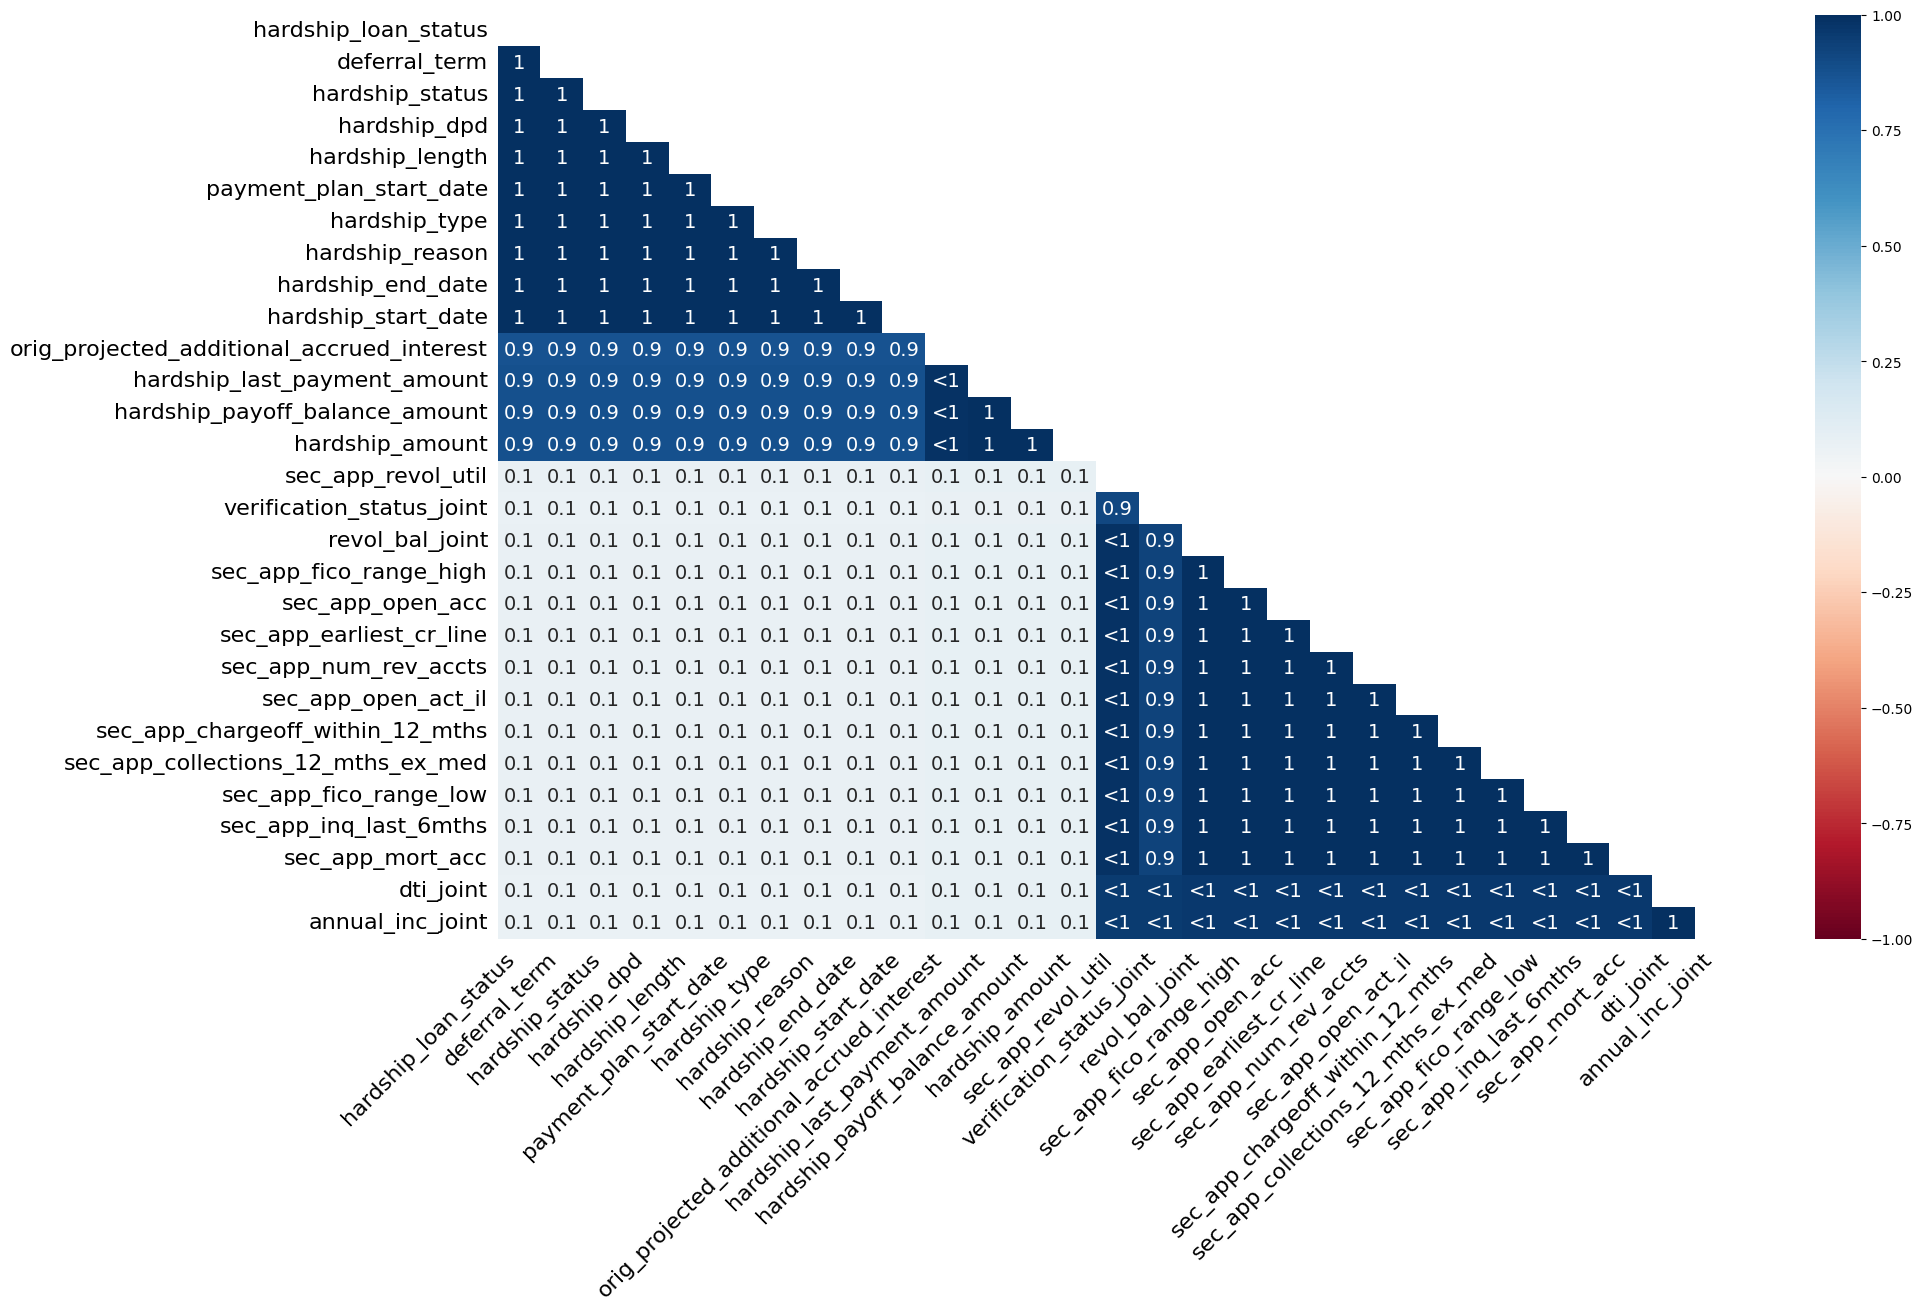

In [21]:
# Filter for columns with missing values greater than 0
missing_values_graph_hardship_second = df_dropped[missing_values[missing_values > 90000].index]

print("Categorical Data Missing Values\n")

# Visualize the missing data using the missingno library
msno.heatmap(missing_values_graph_hardship_second)
# msno.dendrogram(missing_values_graph) #removed for the final anlysis to avoid cluttering the document with the same data but a different way to show it

Let's plot our missing data and search for possible correlations.

Categorical Data Missing Values



<Axes: >

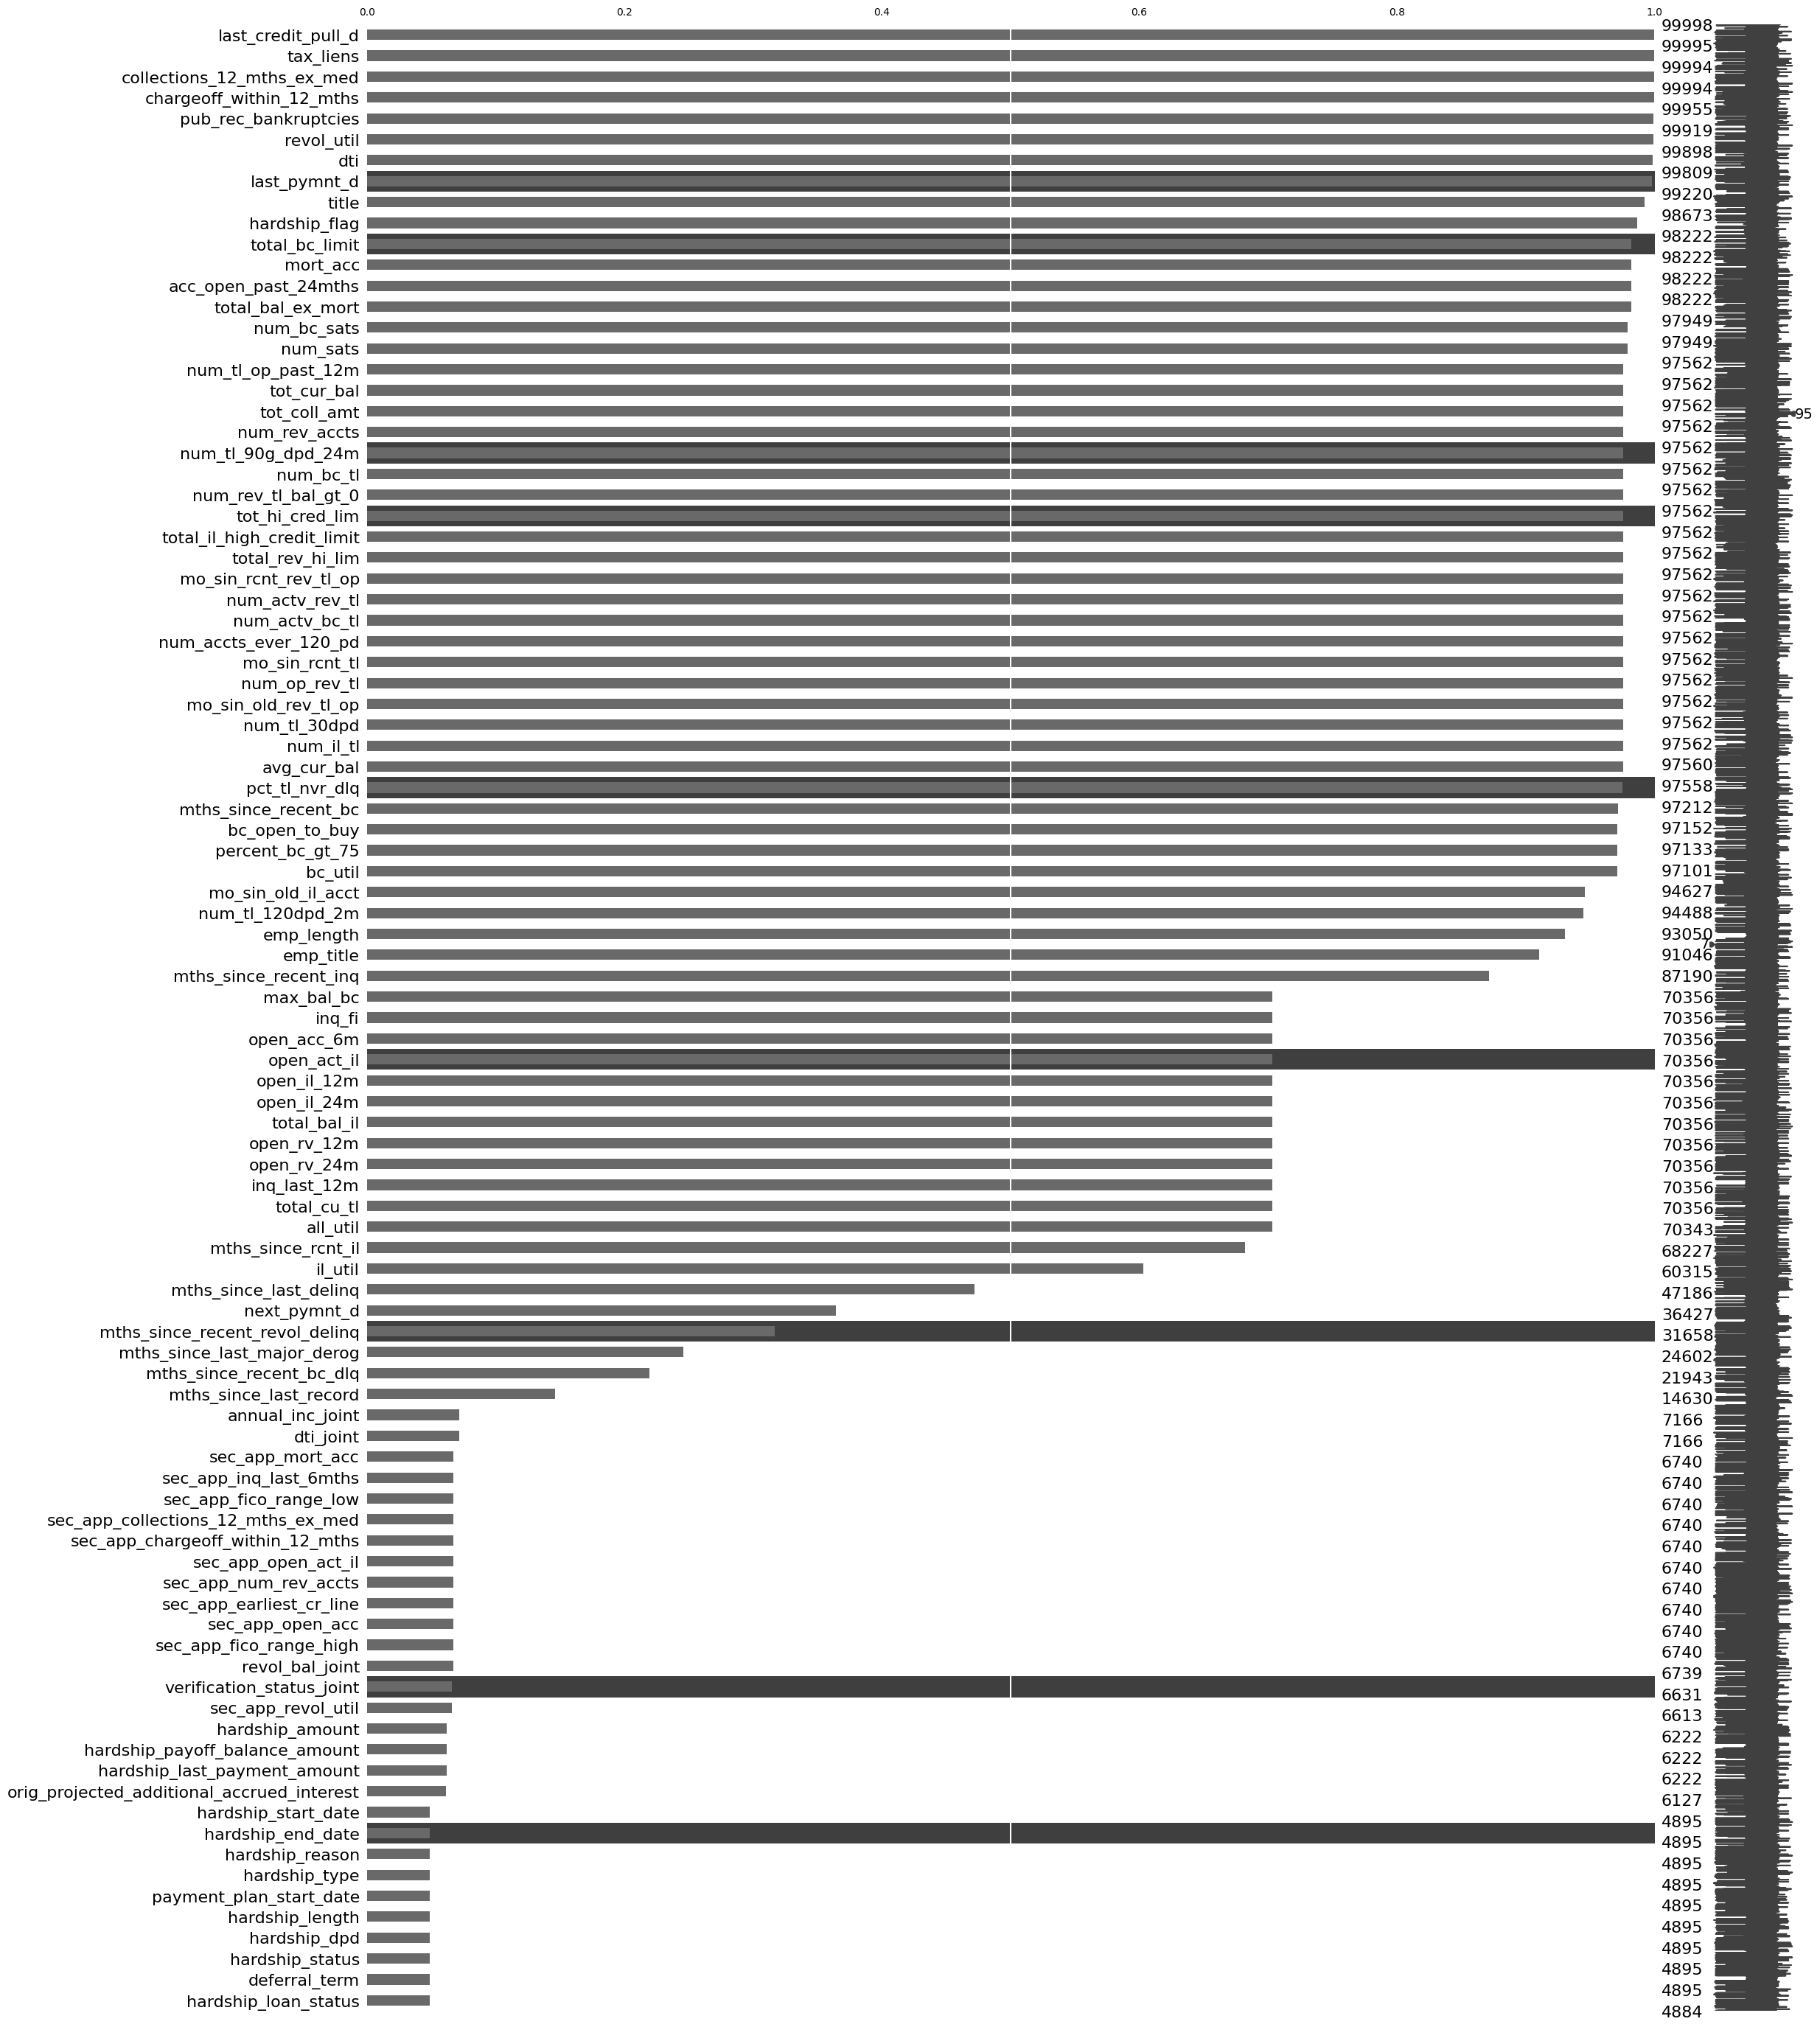

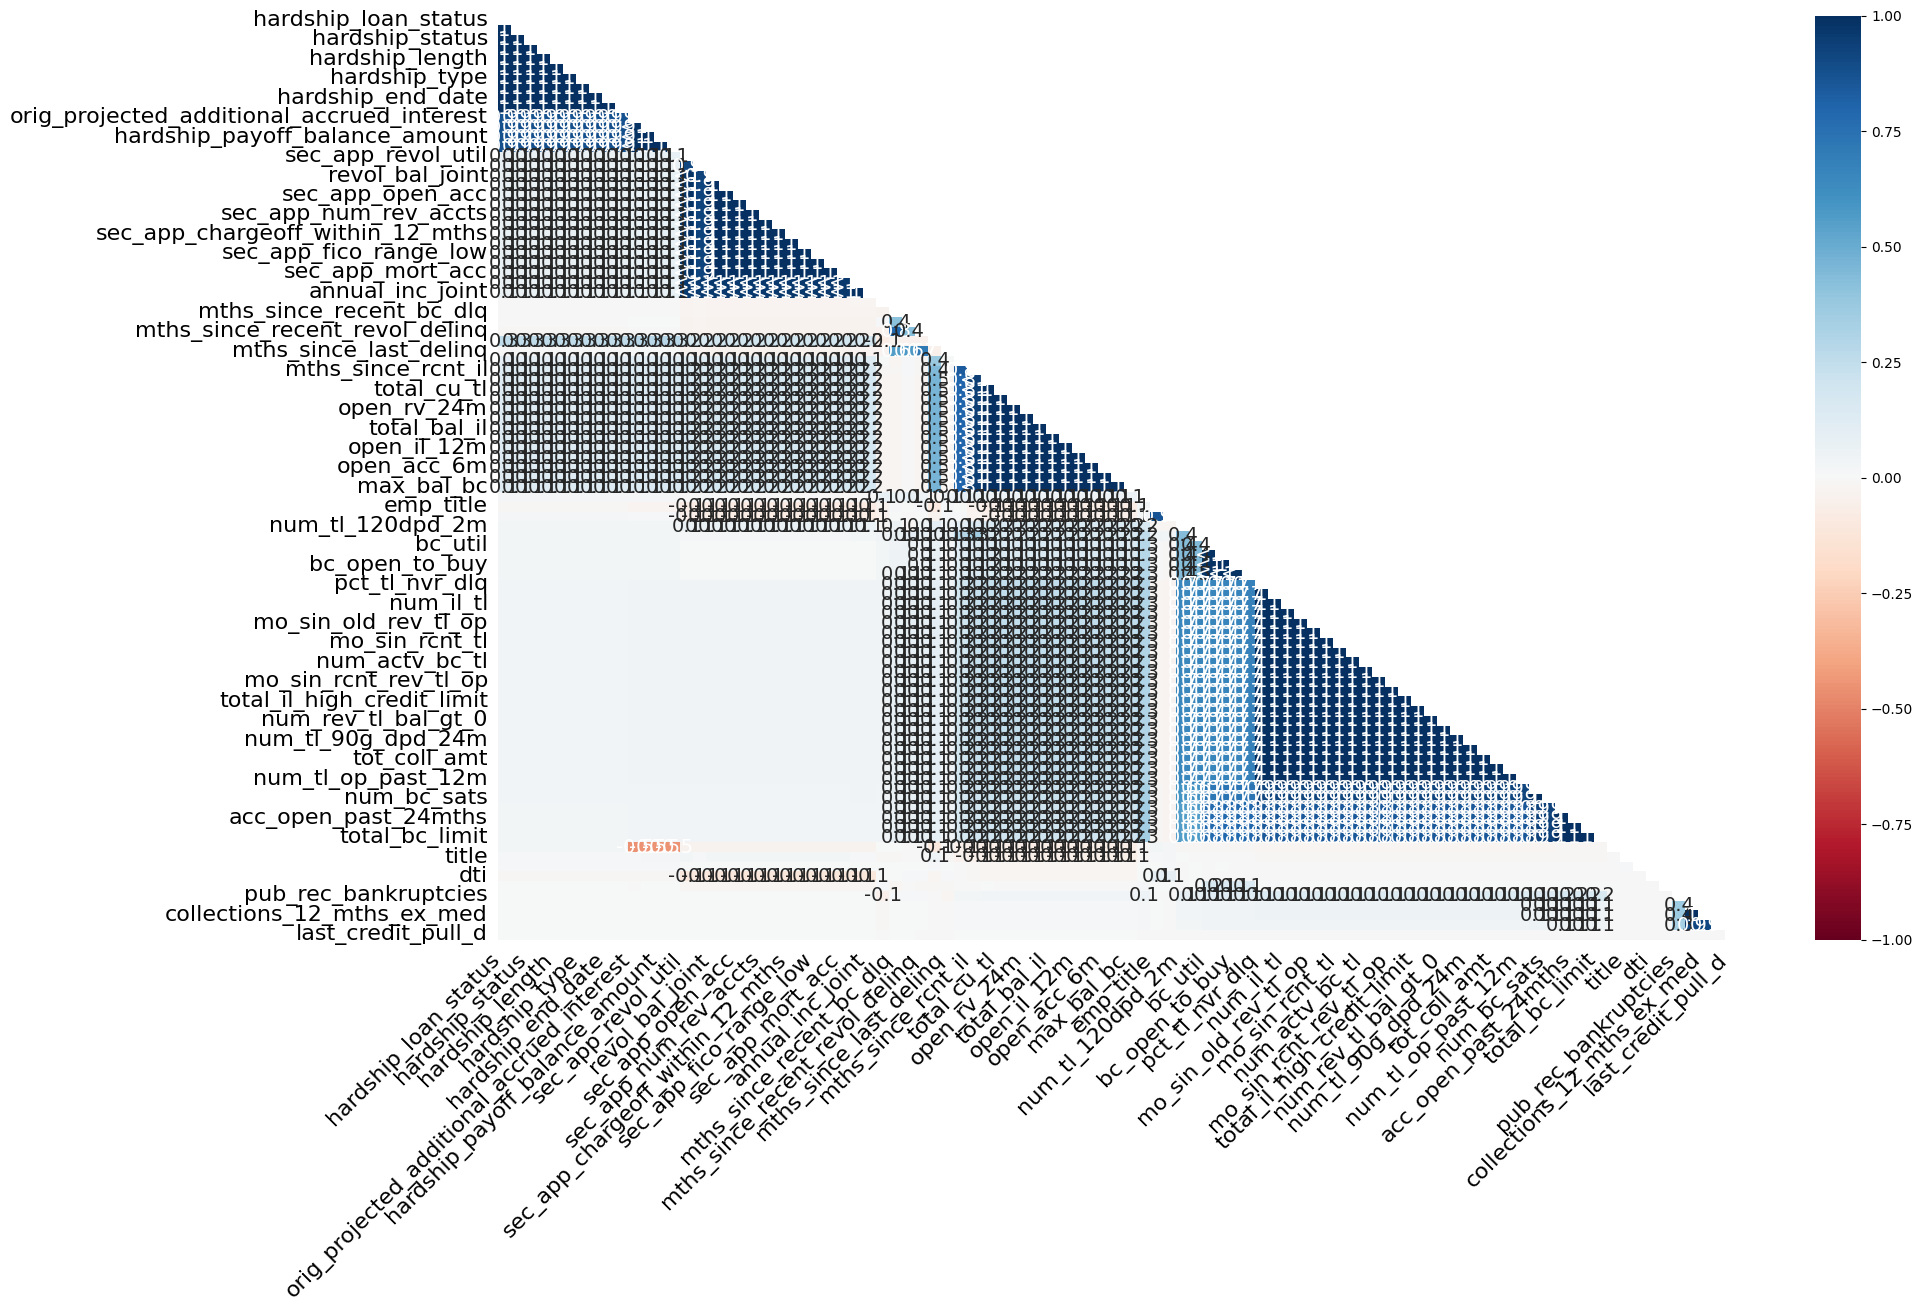

In [16]:
# Filter for columns with missing values greater than 0
missing_values_graph = df_dropped[missing_values[missing_values > 0].index]

print("Categorical Data Missing Values\n")

# Visualize the missing data using the missingno library
msno.matrix(missing_values_graph)
msno.bar(missing_values_graph)
msno.heatmap(missing_values_graph)
# msno.dendrogram(missing_values_graph) #removed for the final anlysis to avoid cluttering the document with the same data but a different way to show it

##### Missing Data Strategy
Instead of dropping columns with a high number of missing values, we may want to retain them for our analysis. 

Following the logic of Abraham Wald's famous airplane and bullet hole logic, it is beneficial to analyse the data we don't have rather than discard potentially useful data i.e. the absence of one is a indicator in its own right.

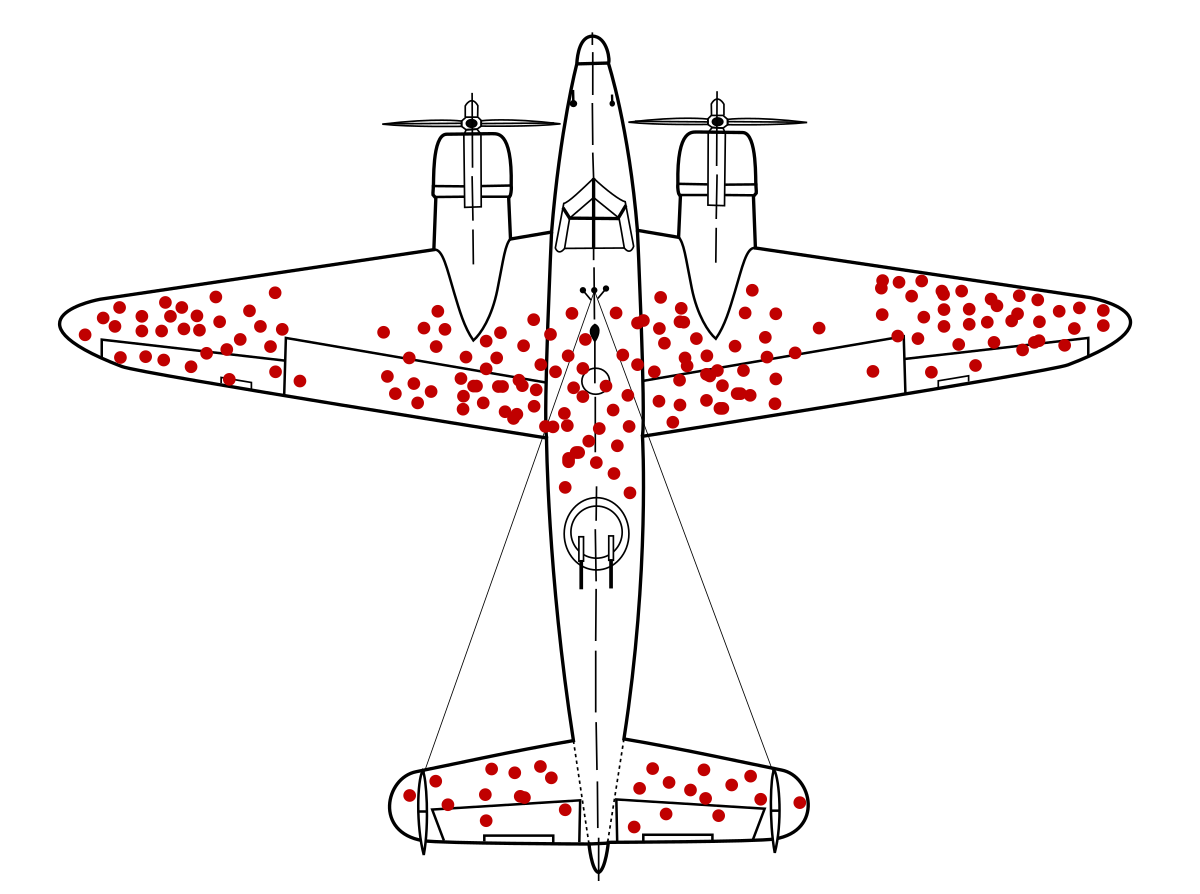

##### Creating Missing Value Indicators

To reiterate instead of dropping columns or rows with missing data, we create missing value indicators for the columns with missing entries that we feel would be good indicators/features for loan application approvals.

This means that for each column with missing values, a new binary indicator column is created, where `1` represents a missing value and `0` indicates that a value was present. 

This approach ensures that we retain as much information as possible from the original dataset while also capturing the fact that missing values themselves may provide valuable insight. For instance, missing income information could be an indicator of a higher default risk and by proxy maybe something that should reduce the score attributed to a client.

#### Converting data types to appropriate formats

#### Removing duplicate records

#### Detecting and handling outliers

#### Standardising and normalising data

#### Encoding categorical variables

#### Cleaning and preprocessing string data

#### Extracting features from date columns

## 02 Exploratory Data Analysis

Conduct an in-depth analysis of the dataset with a focus on the target variable. The analysis should include:

* Exploring the distribution, symmetry, and potential issues with the target variable.
* Using visualization techniques (e.g., histograms, box plots, scatter plots) and statistical analysis to explore relationships between the target variable and independent variables.
* Identifying important variables with predictive relevance.
* Determining which variables or levels can be excluded.
* Identifying variables with outliers and applying transformations if necessary.
* Handling missing values and explaining the chosen treatment.
* Examining interrelationships between independent variables and considering transformations.
* Assessing class balance and addressing any imbalance if needed.
* Summarizing insights and plans to leverage the information.

#### Exploring the Distribution, Symmetry, and Potential Issues with the Target Variable

#### Using Visualization Techniques to Explore Relationships Between the Target Variable and Independent Variables

#### Identifying Important Variables with Predictive Relevance

#### Determining Which Variables or Levels Can Be Excluded

#### Identifying Variables with Outliers and Applying Transformations if Necessary

#### Handling Missing Values and Explaining the Chosen Treatment

#### Examining Interrelationships Between Independent Variables and Considering Transformations

#### Assessing Class Balance and Addressing Any Imbalance if Needed

#### Summarizing Insights and Plans to Leverage the Information

### 03 Modelling

Recommend and justify a model to predict class membership of loan applications. The modeling phase should include:

* Selecting a baseline model for comparison.
* Recommending a challenger model with a detailed justification.
* Describing all data preprocessing steps and measurement of accuracy.
* Choosing appropriate models and evaluation metrics.
* Explaining the choice of models, preprocessing methods, and accuracy metrics.

### 04 Optional - Real-time scoring application

Build a "real-time" application that can score new loan application observations. The implementation details are at the consultant's discretion.